In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from os import listdir
from IPython.display import HTML

%matplotlib notebook

In [2]:
# 3-Dimensional Data Array: (Distances, AWG Driving Voltage, Rx Voltage) Data Points
    # Array Position -> Data Point:
        # Distances              0 -> 5 mm,          1 -> 10 mm,         , ...
        # AWG Driving Voltages   0 -> 300 mV,        1 -> 400 mV,        , ...
        # Rx Voltage             0 -> V_Rx @ t=-100, 1 -> V_Rx @ t=-100+δ, ...

data_arr = np.empty((4, 18, 5004*32))
distances = np.sort(np.array(listdir("../measurements/csv")).astype(np.int))
i = 0
for distance in distances:
    awg_voltages = np.sort(np.array(listdir("../measurements/csv/" + str(distance))).astype(np.int))
    j = 0
    for awg_voltage in awg_voltages:
        measurements = np.array(listdir("../measurements/csv/" + 
                                               str(distance) + "/" + 
                                               str(awg_voltage)))
        k = 0
        for measurement in measurements:
            csv_data = pd.read_csv("../measurements/csv/" + str(distance) +
                                   "/" + str(awg_voltage) + "/" + str(measurement), 
                                   names=["Time", "Rx Voltage (mV)"])
            csv_data = csv_data[2:].drop(["Time"], axis=1).reset_index(drop=True)
            csv_data = csv_data.astype("float64").to_numpy().flatten()
            data_arr[i][j][k*5004:(k+1)*5004] = csv_data
            k += 1
        j += 1
    i += 1

In [3]:
distances = np.empty(len(data_arr)*len(data_arr[0]))
awg_voltages = np.empty(len(data_arr)*len(data_arr[0]))
rx_voltages = np.empty(len(data_arr)*len(data_arr[0]))

data_point_index = 0
for i in range(len(data_arr)):
    for j in range(len(data_arr[i])):
        distances[data_point_index] = (i+1)*5
        awg_voltages[data_point_index] = (j+1)*100+200
        rx_voltages[data_point_index] = (data_arr[i][j][data_arr[i][j]<1E308].max()-
                                         data_arr[i][j][data_arr[i][j]>-1E308].min())/2        
        data_point_index += 1

<IPython.core.display.Javascript object>


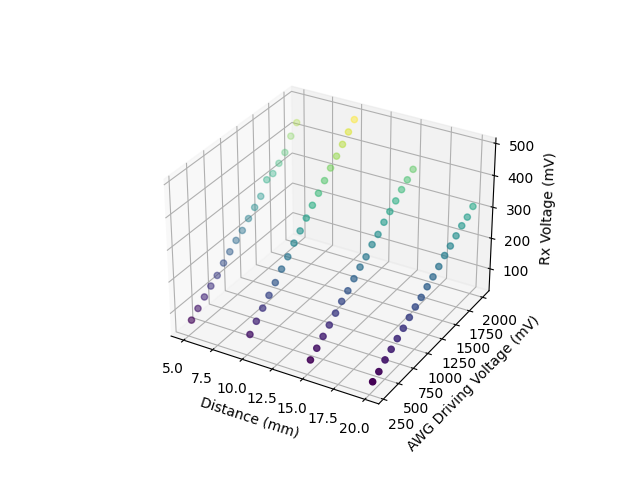

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('Distance (mm)')
ax.set_ylabel('AWG Driving Voltage (mV)')
ax.set_zlabel('Rx Voltage (mV)')

ax.scatter3D(distances, awg_voltages, rx_voltages, c=rx_voltages);

In [5]:
df_list = []

for distance_index in range(len(np.unique(distances))):
    df_rx_voltages = rx_voltages[distance_index*len(np.unique(awg_voltages)):
                                 (distance_index+1)*len(np.unique(awg_voltages))]
    df_awg_voltages = np.unique(awg_voltages)
    df = pd.DataFrame({"AWG Driving Voltage (mV)":df_awg_voltages.astype(int),
                      "Rx Voltage (mV)":np.around(df_rx_voltages, decimals=4)})
    df.style.set_caption("Tx-Rx Distance: " + 
                         str(distances[len(distances)-distance_index*len(np.unique(awg_voltages))-1]) + 
                         " mm").format({'AWG Driving Voltage (mV)':'{:,.0f}','Rx Voltage (mV)':'{:,.4f}'})
    df_list.append(df)

In [6]:
# Tx-Rx distance: 5mm
display(HTML(df_list[0].to_html(index=False)))

AWG Driving Voltage (mV),Rx Voltage (mV)
300,69.5456
400,89.1598
500,108.5024
600,126.1482
700,142.9090
800,165.8467
900,185.2534
1000,205.1225
1100,220.5572
1200,242.6145


In [7]:
# Tx-Rx distance: 10mm
display(HTML(df_list[1].to_html(index=False)))

AWG Driving Voltage (mV),Rx Voltage (mV)
300,83.8099
400,107.6204
500,131.4402
600,154.3778
700,177.3156
800,202.9176
900,224.9672
1000,251.4420
1100,273.4992
1200,297.7615


In [8]:
# Tx-Rx distance: 15mm
display(HTML(df_list[2].to_html(index=False)))

AWG Driving Voltage (mV),Rx Voltage (mV)
300,64.1957
400,82.4732
500,101.4466
600,119.0924
700,138.4991
800,157.9058
900,173.7876
1000,194.5296
1100,213.9424
1200,229.3771


In [9]:
# Tx-Rx distance: 20mm
display(HTML(df_list[3].to_html(index=False)))

AWG Driving Voltage (mV),Rx Voltage (mV)
300,58.4002
400,70.8823
500,88.7143
600,103.2106
700,118.2104
800,132.3222
900,148.2040
1000,163.1977
1100,175.5516
1200,191.4274
